In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob
import geopandas as gpd
import rioxarray as rxr
import rasterio
from rasterio.plot import show, adjust_band
from matplotlib import cm
import matplotlib
from scipy import stats
import datetime
from constants import *

os.chdir(home_dir)
# plt.style.use(home_dir+'stylefile.mplstyle')

tmp = []
for i in range(len(fire_sn)):
    tmp.append(datetime.datetime.strptime(fire_sn['Ig_Date'][i], '%Y-%m-%d'))
fire_sn['dt'] = tmp

In [6]:
print(pe_data_dir)

/Users/marianne/documents/pe_snow_fires/data/


In [7]:
wfigs = gpd.read_file(pe_data_dir + 'WFIGS_Wildland_Fire_Perimeters_Full_History/FH_Perimeter.shp')


In [77]:
idxs = sn_wfigs.irwin_Cont.keys()
tmp = []
for i,x in enumerate(idxs):
    tmp.append(x)
sn_wfigs['count']=tmp



In [88]:
sn_wfigs.keys()[0:100]

Index(['OBJECTID', 'poly_Incid', 'poly_Featu', 'poly_MapMe', 'poly_GISAc',
       'poly_Creat', 'poly_DateC', 'poly_Polyg', 'poly_Acres', 'poly_Globa',
       'poly_Sourc', 'irwin_ABCD', 'irwin_ADSP', 'irwin_Calc', 'irwin_Cont',
       'irwin_Co_1', 'irwin_Dail', 'irwin_Disc', 'irwin_Disp', 'irwin_Esti',
       'irwin_FFRe', 'irwin_FF_1', 'irwin_FF_2', 'irwin_Fire', 'irwin_Fi_1',
       'irwin_Fi_2', 'irwin_Fi_3', 'irwin_Fi_4', 'irwin_Fi_5', 'irwin_Fi_6',
       'irwin_Fi_7', 'irwin_Fi_8', 'irwin_Fi_9', 'irwin_Fi10', 'irwin_Fi11',
       'irwin_FSCo', 'irwin_FSFu', 'irwin_FSMo', 'irwin_FSPo', 'irwin_FSJo',
       'irwin_FSOv', 'irwin_GACC', 'irwin_ICS2', 'irwin_IC_1', 'irwin_IC_2',
       'irwin_IC_3', 'irwin_Inci', 'irwin_In_1', 'irwin_In_2', 'irwin_In_3',
       'irwin_In_4', 'irwin_Init', 'irwin_In_5', 'irwin_In_6', 'irwin_In_7',
       'irwin_Irwi', 'irwin_IsFi', 'irwin_Is_1', 'irwin_IsFS', 'irwin_IsMu',
       'irwin_IsRe', 'irwin_IsTr', 'irwin_IsUn', 'irwin_Loca', 'irwin_Perc',
 

In [91]:
# sn_wfigs = gpd.sjoin(wfigs,sn_watersheds)
tmp = []
for i in sn_wfigs.irwin_Cont.keys():
    try: tmp.append(datetime.datetime.strptime(sn_wfigs.irwin_Cont[i], '%Y-%m-%d'))
    except: tmp.append(np.nan)
sn_wfigs['dt'] = tmp

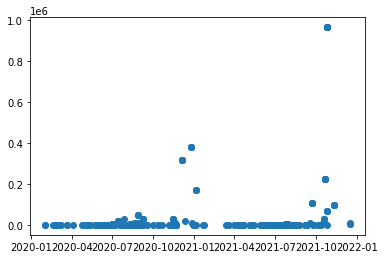

In [95]:
plt.plot(sn_wfigs.dt,sn_wfigs.poly_Acres,'o')

In [ ]:
dt

<AxesSubplot:>

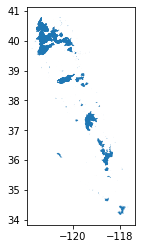

In [12]:
fig,ax= plt.subplots()
sn_wfigs.plot(ax=ax)

In [13]:
sn_wfigs

,OBJECTID,poly_Incid,poly_Featu,poly_MapMe,poly_GISAc,poly_Creat,poly_DateC,poly_Polyg,poly_Acres,poly_Globa,...,NA_L3NAME,NA_L2CODE,NA_L2NAME,NA_L1CODE,NA_L1NAME,STATE_NAME,EPA_REGION,L3_KEY,L2_KEY,L1_KEY
1,128,Patrick,Wildfire Daily Fire Perimeter,Mixed Methods,0.151680,2021-05-04,2021-05-04,None,0.151680,{08D5DE2B-51A0-420A-812F-35902565E93A},...,Sierra Nevada,6.2,WESTERN CORDILLERA,6,NORTHWESTERN FORESTED MOUNTAINS,Nevada,9,5 Sierra Nevada,6.2 WESTERN CORDILLERA,6 NORTHWESTERN FORESTED MOUNTAINS
386,894,Sun,Wildfire Daily Fire Perimeter,Mixed Methods,1.467035,2021-05-04,2021-05-04,None,1.467030,{6C40E62F-F2A3-4DAC-B892-EF0D44389A84},...,Sierra Nevada,6.2,WESTERN CORDILLERA,6,NORTHWESTERN FORESTED MOUNTAINS,Nevada,9,5 Sierra Nevada,6.2 WESTERN CORDILLERA,6 NORTHWESTERN FORESTED MOUNTAINS
633,1400,Snow Flower,Wildfire Daily Fire Perimeter,Mixed Methods,0.034000,2021-05-04,2021-05-04,None,0.034024,{2E7817D8-D6E5-40E4-8BDE-39D1A2F92B5D},...,Sierra Nevada,6.2,WESTERN CORDILLERA,6,NORTHWESTERN FORESTED MOUNTAINS,Nevada,9,5 Sierra Nevada,6.2 WESTERN CORDILLERA,6 NORTHWESTERN FORESTED MOUNTAINS
678,1502,Poeville Road,Wildfire Daily Fire Perimeter,GPS-Flight,2972.758942,2021-05-04,2021-05-04,None,2972.747240,{D70F711E-7CBA-49FB-9955-4994F2CDFA52},...,Sierra Nevada,6.2,WESTERN CORDILLERA,6,NORTHWESTERN FORESTED MOUNTAINS,Nevada,9,5 Sierra Nevada,6.2 WESTERN CORDILLERA,6 NORTHWESTERN FORESTED MOUNTAINS
883,1927,Pinehaven,Wildfire Daily Fire Perimeter,Mixed Methods,512.144195,2022-01-12,2022-01-12,None,512.142779,{2785D2C7-1BCC-4022-AE2A-129220199CC0},...,Sierra Nevada,6.2,WESTERN CORDILLERA,6,NORTHWESTERN FORESTED MOUNTAINS,Nevada,9,5 Sierra Nevada,6.2 WESTERN CORDILLERA,6 NORTHWESTERN FORESTED MOUNTAINS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819,11376,Intanko,Wildfire Daily Fire Perimeter,Image Interpretation,950.000000,2021-06-09,2021-06-29,2021-06-09,820.755825,{B097A21A-A49D-4566-87E9-94E4C780789C},...,Sierra Nevada,6.2,WESTERN CORDILLERA,6,NORTHWESTERN FORESTED MOUNTAINS,California,9,5 Sierra Nevada,6.2 WESTERN CORDILLERA,6 NORTHWESTERN FORESTED MOUNTAINS
8178,13806,River,Wildfire Daily Fire Perimeter,Mixed Methods,2446.000000,2021-08-05,2021-08-06,None,2446.390216,{837F1CB0-EA87-4030-A05B-70F068A396A2},...,Sierra Nevada,6.2,WESTERN CORDILLERA,6,NORTHWESTERN FORESTED MOUNTAINS,California,9,5 Sierra Nevada,6.2 WESTERN CORDILLERA,6 NORTHWESTERN FORESTED MOUNTAINS
6751,12334,Turkey,Wildfire Daily Fire Perimeter,GPS-Walked,NaN,2021-07-12,2021-07-12,2021-06-23,171.390128,{DBF12203-315C-4799-901A-04E4F88293D7},...,Sierra Nevada,6.2,WESTERN CORDILLERA,6,NORTHWESTERN FORESTED MOUNTAINS,California,9,5 Sierra Nevada,6.2 WESTERN CORDILLERA,6 NORTHWESTERN FORESTED MOUNTAINS
8208,13838,Windy,Wildfire Daily Fire Perimeter,Mixed Methods,97528.262621,2021-10-05,2021-10-18,2021-10-17,97527.895470,{59FE1D7F-8D13-448D-83A5-142331973DD0},...,Sierra Nevada,6.2,WESTERN CORDILLERA,6,NORTHWESTERN FORESTED MOUNTAINS,California,9,5 Sierra Nevada,6.2 WESTERN CORDILLERA,6 NORTHWESTERN FORESTED MOUNTAINS
